In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [26]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Datasets\Diabetes.csv")
df

,diastolic,insulin,bmi,diabetes
0,72,0,33.6,1
1,66,0,26.6,0
2,64,0,23.3,1
3,66,94,28.1,0
4,40,168,43.1,1
...,...,...,...,...
195,84,210,39.4,1
196,58,0,24.3,0
197,62,48,22.9,1
198,64,99,34.8,1


In [27]:
df.shape

(200, 4)

In [28]:
df.head()

,diastolic,insulin,bmi,diabetes
0,72,0,33.6,1
1,66,0,26.6,0
2,64,0,23.3,1
3,66,94,28.1,0
4,40,168,43.1,1


In [29]:
df.tail()

,diastolic,insulin,bmi,diabetes
195,84,210,39.4,1
196,58,0,24.3,0
197,62,48,22.9,1
198,64,99,34.8,1
199,60,318,30.9,1


In [30]:
df.describe()

,diastolic,insulin,bmi,diabetes
count,200.000000,200.000000,200.000000,200.000000
mean,69.070000,74.850000,31.836500,0.375000
std,19.348304,117.289949,8.997477,0.485338
min,0.000000,0.000000,0.000000,0.000000
25%,63.500000,0.000000,27.375000,0.000000
50%,72.000000,0.000000,31.950000,0.000000
75%,80.000000,114.250000,36.600000,1.000000
max,122.000000,846.000000,67.100000,1.000000


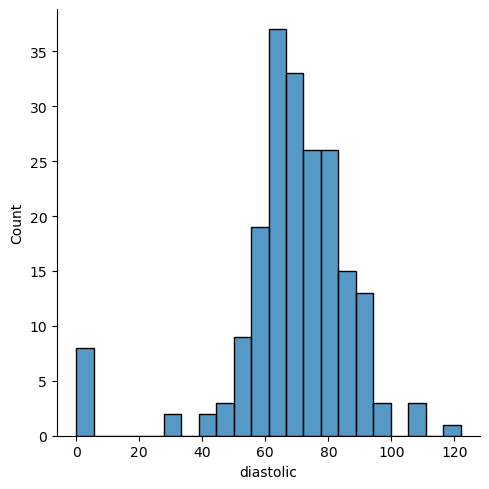

In [31]:
sns.displot(df.diastolic);

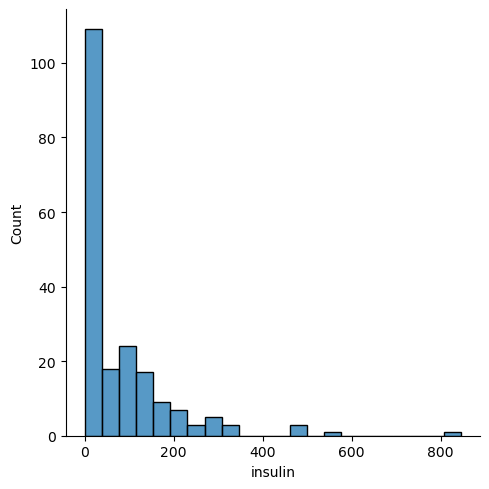

In [32]:
sns.displot(df.insulin);

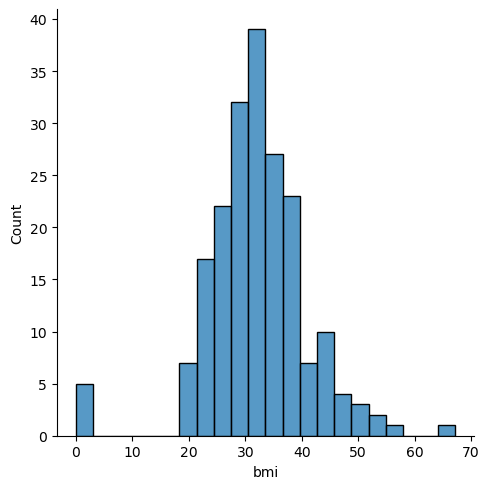

In [33]:
sns.displot(df.bmi	);

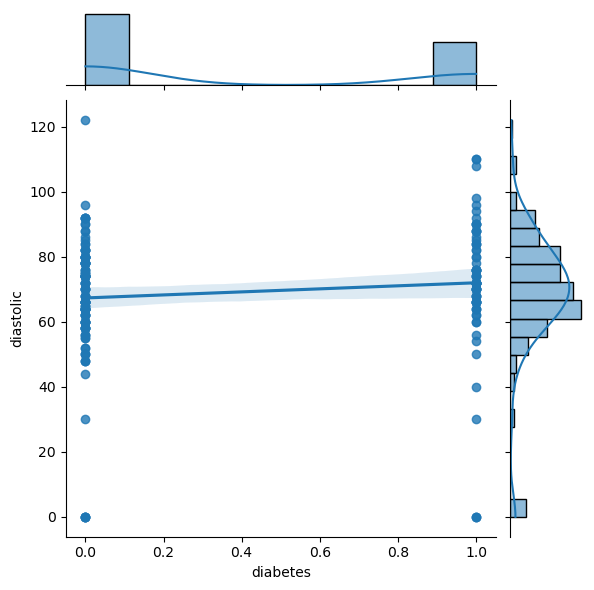

In [34]:
sns.jointplot(x='diabetes',y='diastolic',data=df,kind='reg');

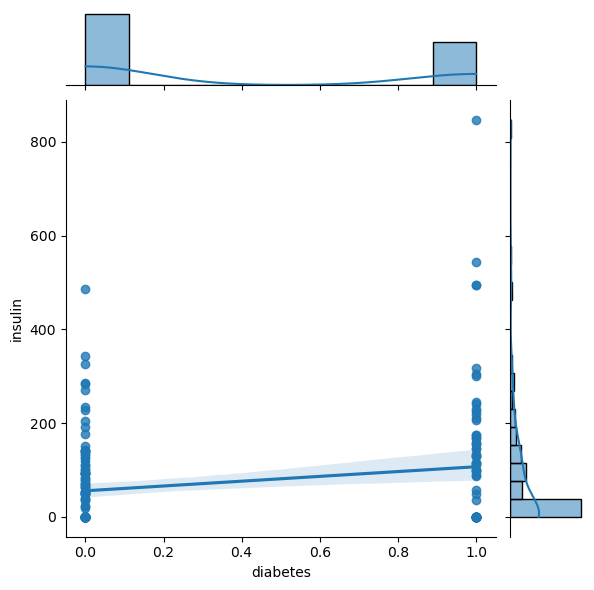

In [35]:
sns.jointplot(x='diabetes',y='insulin',data=df,kind='reg');

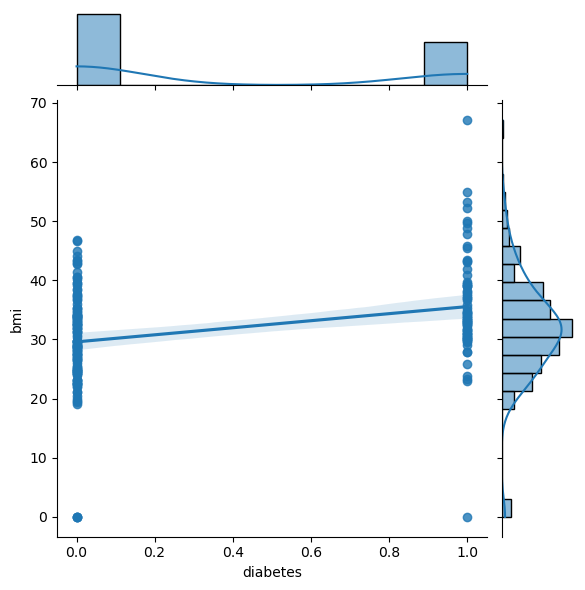

In [36]:
sns.jointplot(x='diabetes',y='bmi',data=df,kind='reg');

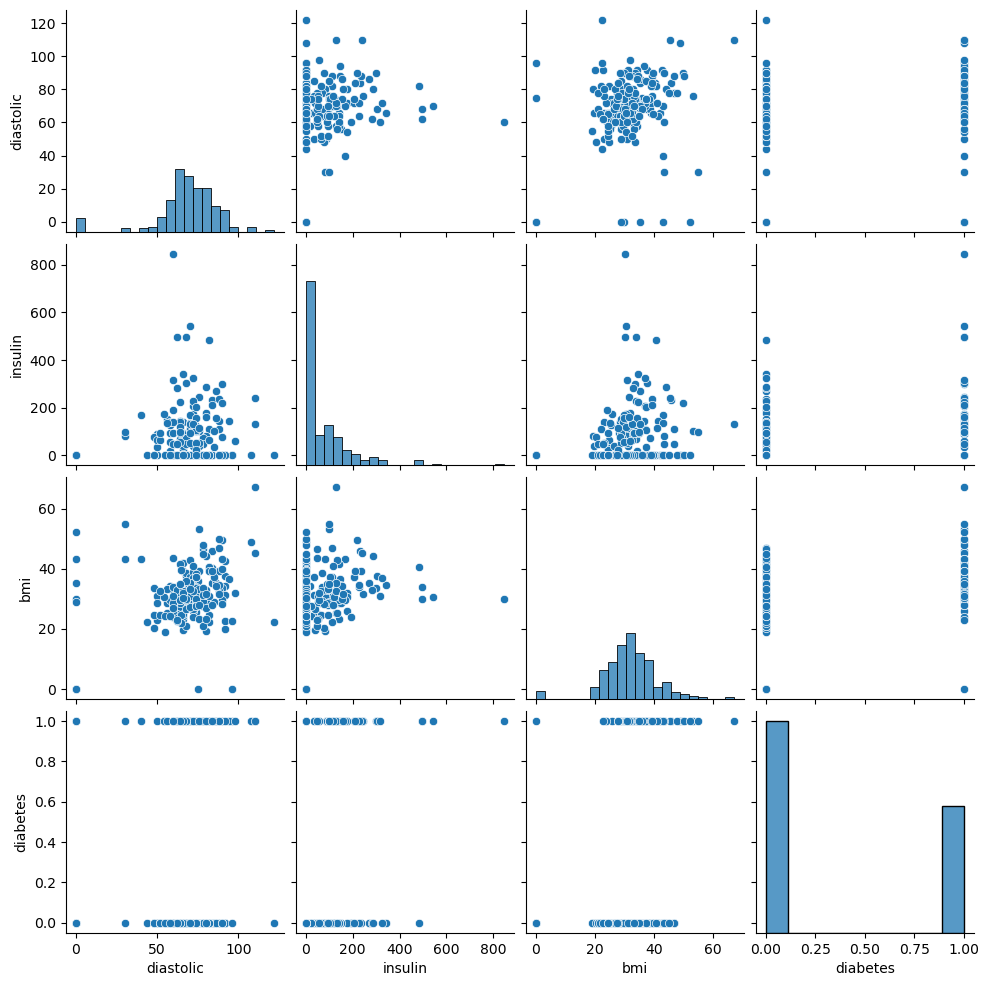

In [37]:
sns.pairplot(df)

In [38]:
df.corr()

,diastolic,insulin,bmi,diabetes
diastolic,1.000000,0.063321,0.243330,0.117060
insulin,0.063321,1.000000,0.170752,0.212237
bmi,0.243330,0.170752,1.000000,0.321592
diabetes,0.117060,0.212237,0.321592,1.000000


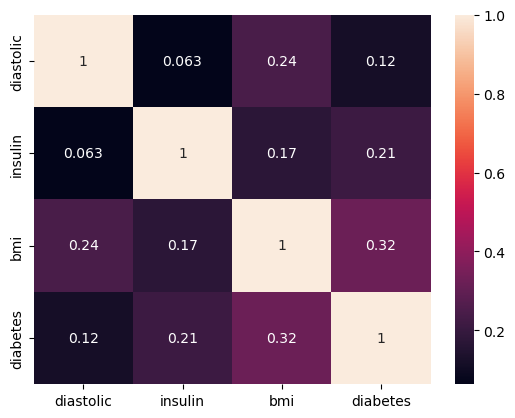

In [39]:
sns.heatmap(df.corr(),annot=True);

In [40]:
df.head()

,diastolic,insulin,bmi,diabetes
0,72,0,33.6,1
1,66,0,26.6,0
2,64,0,23.3,1
3,66,94,28.1,0
4,40,168,43.1,1


In [41]:
df.columns

Index(['diastolic', 'insulin', 'bmi', 'diabetes'], dtype='object')

In [42]:
X=df[['diastolic', 'insulin', 'bmi']]
X.head()

,diastolic,insulin,bmi
0,72,0,33.6
1,66,0,26.6
2,64,0,23.3
3,66,94,28.1
4,40,168,43.1


In [43]:
Y=df['diabetes']
Y

0      1
1      0
2      1
3      0
4      1
      ..
195    1
196    0
197    1
198    1
199    1
Name: diabetes, Length: 200, dtype: int64

In [44]:
X.shape

(200, 3)

In [53]:
X=df[['diastolic','insulin','bmi']]
Y=df['diabetes']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [54]:
X_train.shape

(120, 3)

In [55]:
X_test.shape

(80, 3)

In [56]:
Y_train.shape

(120,)

In [57]:
Y_test.shape

(80,)

In [59]:
X_train.head()

,diastolic,insulin,bmi
168,66,0,31.9
98,50,64,28.7
113,62,0,34.0
101,60,0,26.1
119,76,51,23.2


In [60]:
X_test.head()

,diastolic,insulin,bmi
151,65,0,21.9
118,60,0,28.2
184,74,0,27.6
82,78,71,29.3
77,72,0,37.7


In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train[['diastolic','insulin','bmi']]=mms.fit_transform(X_train[['diastolic','insulin','bmi']])
X_train.head()

,diastolic,insulin,bmi
168,0.540984,0.000000,0.580000
98,0.409836,0.129293,0.521818
113,0.508197,0.000000,0.618182
101,0.491803,0.000000,0.474545
119,0.622951,0.103030,0.421818


In [67]:
#Linear Regression

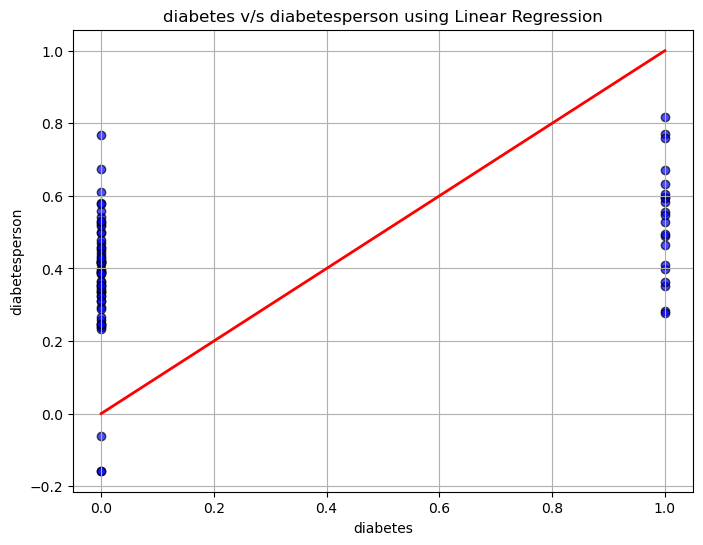

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

X=df[['diastolic','insulin','bmi']]
Y=df['diabetes']

#spliting the model

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

#Train the model
model=LinearRegression()
model.fit(X_train,Y_train)

#predict 
Y_pred=model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(Y_test,Y_pred,color='blue',edgecolor='k',alpha=0.7)
plt.xlabel('diabetes')
plt.ylabel('diabetesperson')
plt.title("diabetes v/s diabetesperson using Linear Regression")
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red',linewidth=2)
plt.grid(True)
plt.show()